# 1. Image reading and preprocessing

In [26]:
import cv2
import pytesseract
import numpy as np

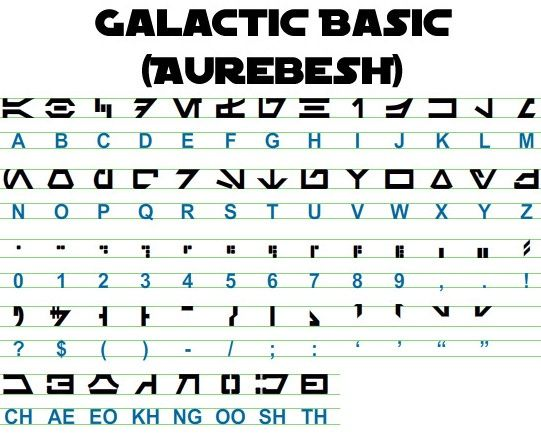

In [27]:
from IPython.display import Image
Image('fig/image.jpg')

In [28]:
img = cv2.imread('fig/image.jpg')
img[0]

array([[255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       ...,
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255]], dtype=uint8)

In [29]:
## Document for quality improvement ##
# https://tesseract-ocr.github.io/tessdoc/ImproveQuality.html

#### Preprocessing functions ####

# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 

In [30]:
gray = get_grayscale(img)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)

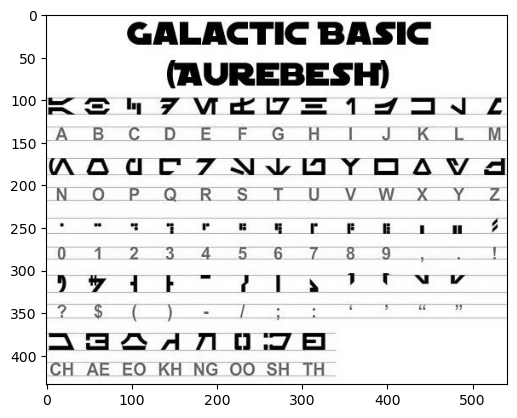

In [31]:
import matplotlib.pyplot as plt
plt.imshow(gray, cmap = 'gray')

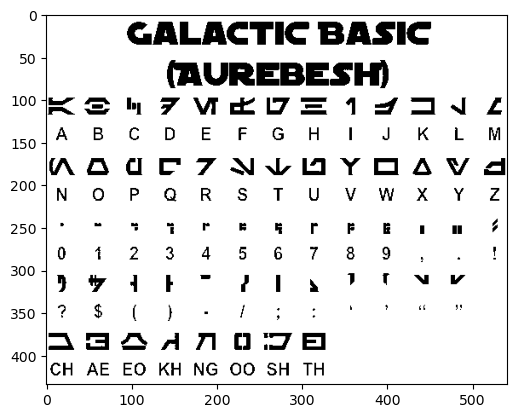

In [32]:
plt.imshow(thresh, cmap = 'gray')

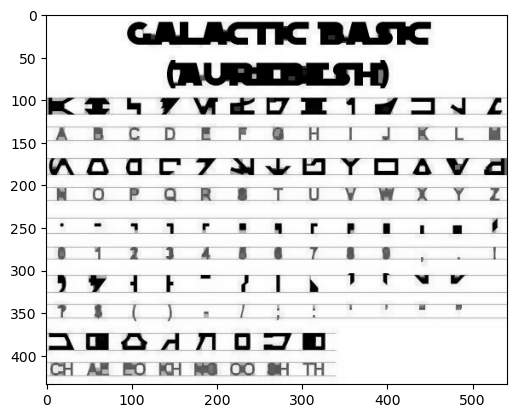

In [33]:
plt.imshow(opening, cmap = 'gray')

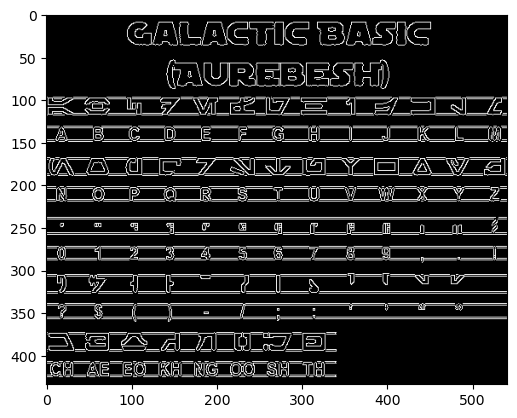

In [34]:
plt.imshow(canny, cmap = 'gray')

In [35]:
custom_config = r'--oem 3 --psm 6'
string_original = pytesseract.image_to_string(img, config=custom_config)
string_thresh = pytesseract.image_to_string(thresh, config=custom_config)
string_gray = pytesseract.image_to_string(gray, config=custom_config)

In [36]:
import pprint as p_
p_.pprint(string_original)

('GALACTIC BASIC\n'
 '(AUREBESH)\n'
 'REehHTFVMVEVE ITZ IoIN\n'
 'AB CUD ET FE GG mn Td KC\n'
 'AOder7NvToYoAVaA\n'
 'N_ Oo. 8 _ HG: Re SS Ty wee Ve\n'
 'a a F< 2\n'
 'Sy a a a ay Se ae: |\n'
 'i a a ey ee ee\n'
 '2 a (a a eS\n'
 'ASGaSANADI\n'
 'CH AE EO KH NG OO SH TH\n')


In [37]:
p_.pprint(string_thresh)
p_.pprint(string_gray)

('GALACTIC BASIC\n'
 '(AVREBESH)\n'
 'Ree 7FVeEVEi1i fol Z\n'
 'A BC DEF GH I J K LM\n'
 'AOdCeTT7TNVTOYOAVA\n'
 'N O P Q@R S$ TU VW X Y¥Y Z\n'
 '"oe 3 3 Pr 8B Rf oP F Boao m\n'
 '0 42 3 4 5 6 7 8 9 , . !\n'
 'by A\n'
 'i\n'
 'AaGdSANDIE\n'
 'CH AE EO KH NG OO SH TH\n')
('GALACTIC BASIC\n'
 '(AUREBESH)\n'
 'REehHTFVMVEVESITZwIoIN es\n'
 'A.B CUD EU FUG mH UT dT rk UC\n'
 'AOdr7NnvTvoYoAaAVvVaA\n'
 'NO. PG: Re ST Wx\n'
 '‘ss 4 oe 8 gf Pf F &f 4 mw 4\n'
 'CE, ey aE aT |. a SS N:P\n'
 'a a ee ae ee\n'
 'cs ¢ ) = fo\n'
 'ASaSANnNADITe\n'
 'CH AE EO KH NG 00 SH TH\n')


- Invoice reading example

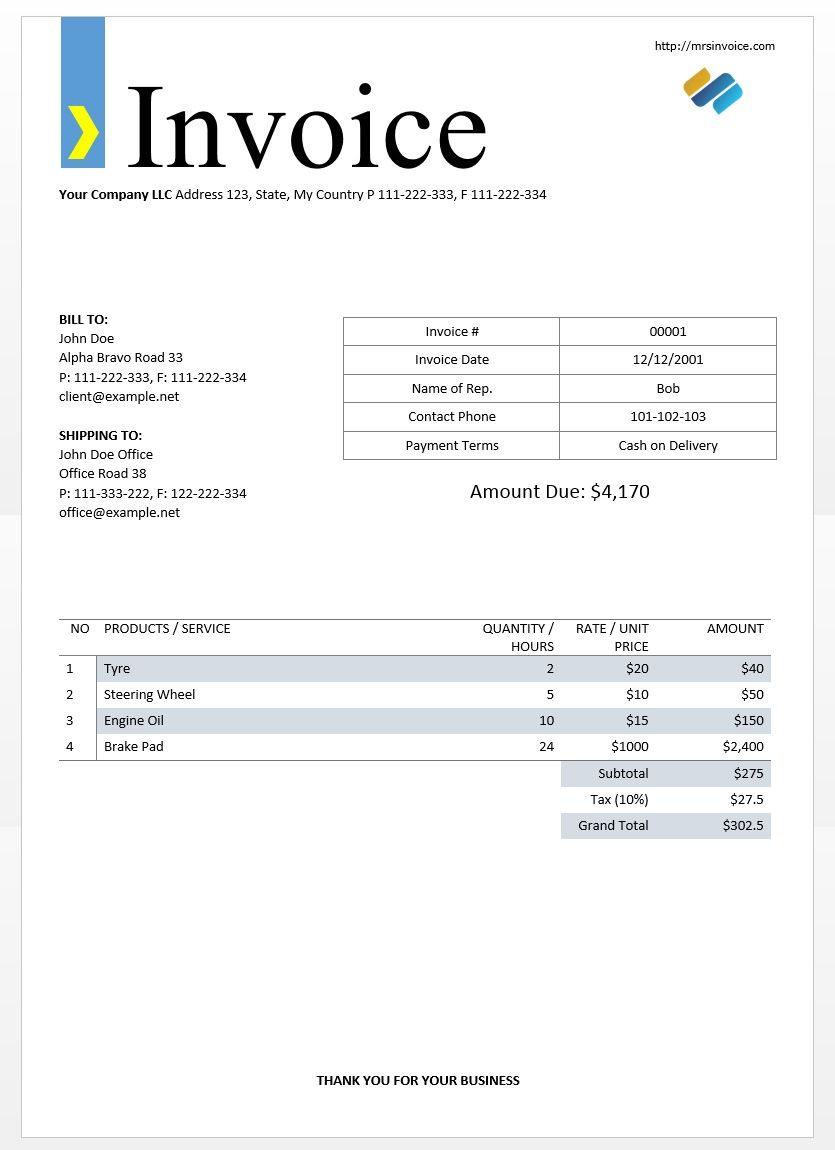

In [38]:
from IPython.display import Image
Image('fig/invoice-sample.jpg')

In [39]:
import cv2
import pytesseract
from pytesseract import Output

img = cv2.imread('fig/invoice-sample.jpg')

d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


In [40]:
import pprint as p_
p_.pprint(' '.join(d['text']))

('    , Invoice    Your Company LLC Address 123, State, My Country P '
 '111-222-333, F 111-222-334    BILL TO:  John Doe   Alpha Bravo Road 33   P: '
 '111-222-338, F: 111-222-834  client@example.net    SHIPPING TO:  John Doe '
 'Office   Office Road 38   P: 111-383-222, F: 122-222-334  '
 'office@example.net    http://mrsinvoice.com                             '
 'Invoice # 00001  Invoice Date 12/12/2001  Name of Rep. Bob   Contact Phone '
 '101-102-103         Payment Terms              Cash on Delivery              '
 'Amount Due: $4,170                        NO PRODUCTS / SERVICE QUANTITY / '
 'RATE / UNIT AMOUNT  HOURS PRICE   1 tye 2 $20 $40   2__| Steering Wheel 5 '
 '$10 $50   3 | Engine oil 10 $15 $150   4 | Brake Pad 24 $1000 $2,400   '
 'Subtotal $275   Tax (10%) $275   Grand Total $302.5    ‘THANK YOU FOR YOUR '
 'BUSINESS')


In [63]:
data_ext = ' '.join(d['text'])
data_ext

'    , Invoice    Your Company LLC Address 123, State, My Country P 111-222-333, F 111-222-334    BILL TO:  John Doe   Alpha Bravo Road 33   P: 111-222-338, F: 111-222-834  client@example.net    SHIPPING TO:  John Doe Office   Office Road 38   P: 111-383-222, F: 122-222-334  office@example.net    http://mrsinvoice.com                             Invoice # 00001  Invoice Date 12/12/2001  Name of Rep. Bob   Contact Phone 101-102-103         Payment Terms              Cash on Delivery              Amount Due: $4,170                        NO PRODUCTS / SERVICE QUANTITY / RATE / UNIT AMOUNT  HOURS PRICE   1 tye 2 $20 $40   2__| Steering Wheel 5 $10 $50   3 | Engine oil 10 $15 $150   4 | Brake Pad 24 $1000 $2,400   Subtotal $275   Tax (10%) $275   Grand Total $302.5    ‘THANK YOU FOR YOUR BUSINESS'

In [86]:
string_list = [x for x in d['text'] if x not in ['', ',']]
' '.join([x for x in d['text'] if x not in ['', ',']])

'Invoice Your Company LLC Address 123, State, My Country P 111-222-333, F 111-222-334 BILL TO: John Doe Alpha Bravo Road 33 P: 111-222-338, F: 111-222-834 client@example.net SHIPPING TO: John Doe Office Office Road 38 P: 111-383-222, F: 122-222-334 office@example.net http://mrsinvoice.com           Invoice # 00001 Invoice Date 12/12/2001 Name of Rep. Bob Contact Phone 101-102-103   Payment Terms     Cash on Delivery     Amount Due: $4,170         NO PRODUCTS / SERVICE QUANTITY / RATE / UNIT AMOUNT HOURS PRICE 1 tye 2 $20 $40 2__| Steering Wheel 5 $10 $50 3 | Engine oil 10 $15 $150 4 | Brake Pad 24 $1000 $2,400 Subtotal $275 Tax (10%) $275 Grand Total $302.5 ‘THANK YOU FOR YOUR BUSINESS'

In [158]:
import re
date_pattern = '[0-9]{1,2}\/[0-9]{1,2}\/[0-9]{4}'
date_rgx = re.compile(date_pattern)
s = re.findall(date_rgx, data_ext)
invoice_date = s[0]
invoice_date


'12/12/2001'

In [170]:
table_idx = [idx for idx,item in enumerate(string_list) if re.search('PRICE',item) or re.search('Subtotal',item)]
table_idx

table_info =' '.join(string_list[table_idx[0]+1:table_idx[1]])

item_name = [' '.join(sub.split('$')[0].strip().split(' ')[:-1]) for sub in table_info.split('|')]
item_nb=[int(sub.split('$')[0].strip().split(' ')[-1]) for sub in table_info.split('|')]
unit_price = [float(sub.split('$')[1].replace(' ','')) for sub in table_info.split('|')]
item_price = [float(sub.split('$')[2].split(' ')[0].replace(',','')) for sub in table_info.split('|')]


In [188]:
import pandas as pd
invoice_contents = pd.DataFrame({'name':item_name,
                                 'nb':item_nb,
                                 'unit_price': unit_price,
                                 'sub_total':item_price})
invoice_contents['date'] = invoice_date
invoice_contents['date'] = pd.to_datetime(invoice_contents['date'], dayfirst=False)
invoice_contents['Correct'] = invoice_contents.nb.values*invoice_contents.unit_price.values ==invoice_contents.sub_total.values
invoice_contents


,name,nb,unit_price,sub_total,date,Correct
0,1 tye,2,20.0,40.0,2001-12-12,True
1,Steering Wheel,5,10.0,50.0,2001-12-12,True
2,Engine oil,10,15.0,150.0,2001-12-12,True
3,Brake Pad,24,1000.0,2400.0,2001-12-12,False


In [ ]:
amount_idx = [idx for idx,item in enumerate(string_list) if re.search('Amount',item)]
amount_due = [string_list[i+2] for i in amount_idx][0].replace('$', '').replace(',', '')
amount_due = float(amount_due)
amount_due

4170.0